In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import sys, os
import numpy as np
import pandas as pd
from collections import Counter

Using TensorFlow backend.


In [3]:
os.listdir()

['(0716).ipynb',
 '.idea',
 '.ipynb_checkpoints',
 '0724_quiz_cost_NHG.ipynb',
 '15year_max_power.csv',
 '190826-example.txt',
 '20190702_pandas_numpy',
 'baekjoon_array.ipynb',
 'baekjoon_for.ipynb',
 'BEXX0003.txt',
 'bigcon01.ipynb',
 'bigcon02.ipynb',
 'bigcon03.ipynb',
 'bigcon03_review.ipynb',
 'bigcon_cha.ipynb',
 'BrainStorming for bigcon_hj.md',
 'cats_dogs.ipynb',
 'Code03-02 mission.ipynb',
 'data',
 'datasets',
 'day10_EDA.ipynb',
 'day11_01_extraction.ipynb',
 'day11_decision_tree.ipynb',
 'day11_quiz.ipynb',
 'Day12.ipynb',
 'day14-01.ipynb',
 'day14-Quiz.ipynb',
 'day14_datatraining.ipynb',
 'day15-3-spam.ipynb',
 'day15_Corr.ipynb',
 'day15_EDA.ipynb',
 'day16 _recommnadation_system.ipynb',
 'day16_quiz1.ipynb',
 'day16_quizbyGHG.ipynb',
 'day16_realQuiz.ipynb',
 'day17_NeuralNetwork.ipynb',
 'day17_quiz01.ipynb',
 'day18_activationFunc.ipynb',
 'day19_propagation_B&F.ipynb',
 'day19_quiz.ipynb',
 'day1_FirstClass.ipynb',
 'Day1_Numpy_Fund.py',
 'day1_quiz01.ipynb',
 'd

In [4]:
path = "C:/Users/user/Desktop/data"
dir_Flickr_jpg = "C:/Users/user/Desktop/data/Flickr8k_Dataset/Flicker8k_Dataset"
dir_Flickr_text = "C:/Users/user/Desktop/data/Flickr8k_text/Flickr8k.token.txt"

In [5]:
jpgs=os.listdir(dir_Flickr_jpg)
print("이미지 개수 : {}".format(len(jpgs))) #8091개 이미지

이미지 개수 : 8091


In [6]:
file=open(dir_Flickr_text,"r")
text=file.read()

datatxt=[]
for line in text.split("\n"):
    col=line.split("\t")
    if len(col)==1:
        continue
    w=col[0].split("#") #[1000268201_693b08cb0e.jpg, 0]
    #w + [col[1].lower()]#[1000268201_693b08cb0e.jpg,0,캡션]
    datatxt.append(w + [col[1].lower()])
    
df_txt=pd.DataFrame(datatxt  , 
                    columns=["filename","index","caption"])


In [7]:
df_txt

,filename,index,caption
0,1000268201_693b08cb0e.jpg,0,a child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,1,a girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,2,a little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,3,a little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,4,a little girl in a pink dress going into a woo...
5,1001773457_577c3a7d70.jpg,0,a black dog and a spotted dog are fighting
6,1001773457_577c3a7d70.jpg,1,a black dog and a tri-colored dog playing with...
7,1001773457_577c3a7d70.jpg,2,a black dog and a white dog with brown spots a...
8,1001773457_577c3a7d70.jpg,3,two dogs of different breeds looking at each o...
9,1001773457_577c3a7d70.jpg,4,two dogs on pavement moving toward each other .


In [8]:
uni_filenames=np.unique(df_txt.filename.values)
print("유일한 파일명의 개수 : {}".format(len(uni_filenames)))
print("파일별 캡션의 개수 : {}".format(Counter(Counter(df_txt.filename.values).values())))


유일한 파일명의 개수 : 8092
파일별 캡션의 개수 : Counter({5: 8092})


In [9]:
from keras.preprocessing.image import load_img, img_to_array

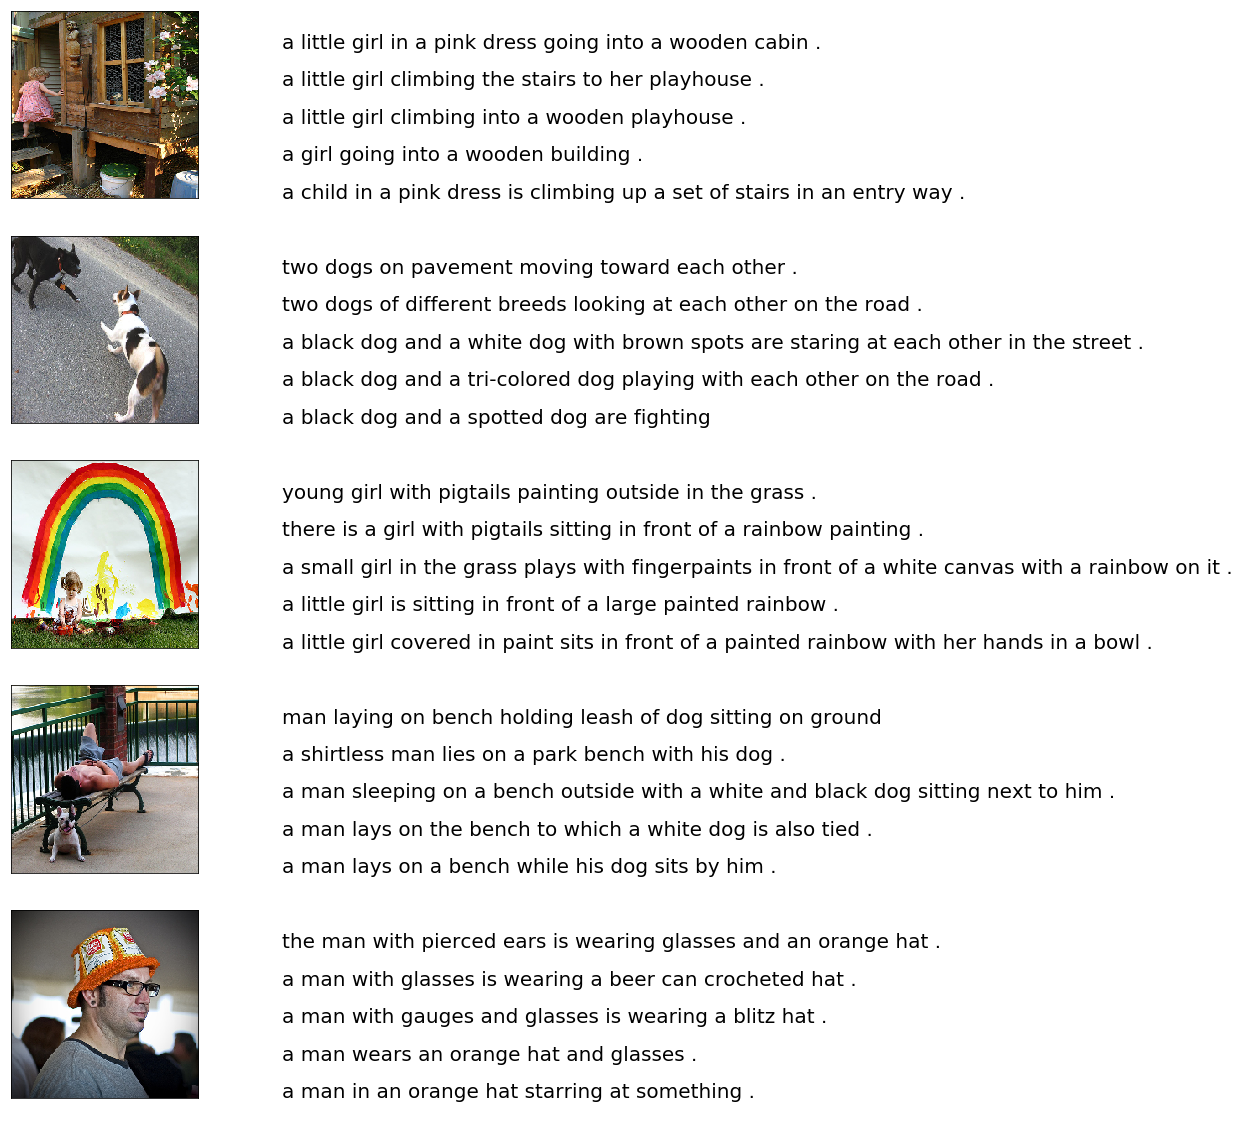

In [10]:
#이미지 5개, 캡션 출력
npic=5 #5개 이미지
npix=224
target_size=(npix,npix,3) #224,224,3
fig=plt.figure(figsize=(10,20))
count=1
for jpgfnm in uni_filenames[:npic]:
    filename=dir_Flickr_jpg+"/"+jpgfnm
    captions=list(df_txt['caption'].loc[df_txt['filename']==jpgfnm].values)
    #print(captions)
    image_load=load_img(filename, target_size=target_size)
    
    ax=fig.add_subplot(npic,2,count,xticks=[], yticks=[])
    ax.imshow(image_load)
    count+=1
    
    ax=fig.add_subplot(npic,2,count)
    ax.plot()
    plt.axis("off")
    ax.set_xlim(0,1)
    ax.set_ylim(0,len(captions))    
    for i, caption in enumerate(captions):
        ax.text(0,i,caption,fontsize=20)
    count+=1
plt.show()

In [11]:
def df_word(df_txt):
    vocabulary=[]
    for txt in df_txt.caption.values:
        vocabulary.extend(txt.split())
    #print("voc size:%d" % len(set(vocabulary))
          #voc size : 8918 (서로 다른 단어의 개수)
    ct=Counter(vocabulary)
    dfword=pd.DataFrame({"word":list(ct.keys()),
                         "count":list(ct.values())})
    dfword=dfword.sort_values(by=['count'], axis=0, ascending=False)
    dfword=dfword.reset_index()[['word', 'count']]  
    return(dfword)
          
dfword=df_word(df_txt)
dfword.head(10)

#voc size
#a 50000
#in 45000
#...


,word,count
0,a,62989
1,.,36581
2,in,18975
3,the,18419
4,on,10744
5,is,9345
6,and,8852
7,dog,8136
8,with,7765
9,man,7266


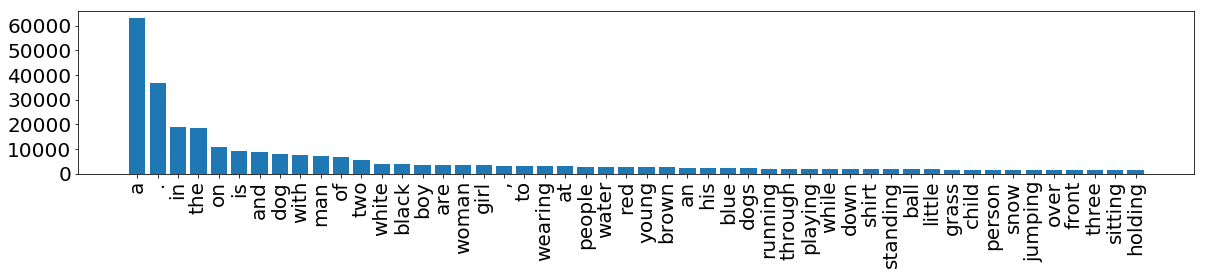

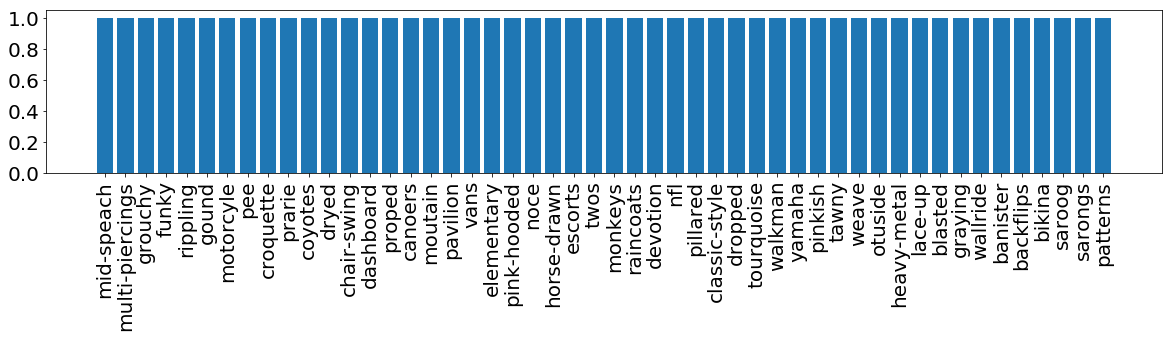

In [12]:
#상위 50개 빈번한 단어 출력
topn=50

def plthist(dfsub):
    plt.figure(figsize=(20,3))
    plt.bar(dfsub.index, dfsub['count'])
    plt.yticks(fontsize=20)
    plt.xticks(dfsub.index, dfsub['word'], rotation=90, fontsize=20)
    plt.show()
    

plthist(dfword.iloc[:topn, :])#상위 50개
plthist(dfword.iloc[-topn:, :])#하위 50개

In [13]:
import string
text_original="I ate 1000 apples and a banana. I have python v3.0. It's 11:50 am. Could you buy me iphone7?"

In [14]:
def remove_punctuation(text_original):
    text_no_punctuation=text_original.translate(string.punctuation)
    return(text_no_punctuation)    
text_no_punctuation=remove_punctuation(text_original)    
print(text_no_punctuation)
    
def remove_single_character(text):
    text_len_more_than1=""
    for word in text.split():
        if len(word)>1:
            text_len_more_than1+=" "+word
    return(text_len_more_than1)    
text_len_more_than1=remove_single_character(text_no_punctuation)    
print(text_len_more_than1)

def remove_numeric(text):
    text_no_numeric=""
    for word in text.split():
        isalpha=word.isalpha()    
        if isalpha:
            text_no_numeric+=" "+word
    return(text_no_numeric)
    
text_no_numeric=remove_numeric(text_len_more_than1)    
print(text_no_numeric)
    

I ate 1000 apples and a banana. I have python v3.0. It's 11:50 am. Could you buy me iphone7?
 ate 1000 apples and banana. have python v3.0. It's 11:50 am. Could you buy me iphone7?
 ate apples and have python Could you buy me


In [15]:
def text_clean(text_original):
    text=remove_punctuation(text_original)
    text=remove_single_character(text)
    text=remove_numeric(text)
    return(text)

In [16]:
for i, caption in enumerate(df_txt.caption.values):
    newcaption=text_clean(caption)
    df_txt['caption'].iloc[i]=newcaption

In [17]:
df_txt['caption'].head(3)

0     child in pink dress is climbing up set of sta...
1                      girl going into wooden building
2           little girl climbing into wooden playhouse
Name: caption, dtype: object

In [18]:
from copy import copy
def add_start_end_seq_token(captions):
    caps=[]
    for txt in captions:
        txt='startseq ' + txt + ' endseq'
        caps.append(txt)
    return(caps)        
df_txt0=copy(df_txt)
df_txt0['caption']=add_start_end_seq_token(df_txt['caption'])   

In [19]:
df_txt0.head(5)

,filename,index,caption
0,1000268201_693b08cb0e.jpg,0,startseq child in pink dress is climbing up s...
1,1000268201_693b08cb0e.jpg,1,startseq girl going into wooden building endseq
2,1000268201_693b08cb0e.jpg,2,startseq little girl climbing into wooden pla...
3,1000268201_693b08cb0e.jpg,3,startseq little girl climbing the stairs to h...
4,1000268201_693b08cb0e.jpg,4,startseq little girl in pink dress going into...


In [20]:
from keras.applications import VGG16
modelvgg=VGG16(include_top=True, weights=None)
#include_top 출력 레이어를 포함시킬 것인지 여부
#weigths : 사전에 훈련된 가중치를 사용 여부

W0926 09:09:41.617978  7580 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0926 09:09:41.837753  7580 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0926 09:09:41.840763  7580 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0926 09:09:41.881477  7580 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [21]:
path_vgg = "C:/Users/user/Desktop/to"
vgg = "C:/Users/user/Desktop/to/vgg16_weights_tf_dim_ordering_tf_kernels (1).h5"


In [22]:


modelvgg.load_weights(vgg)
modelvgg.summary()

W0926 09:09:48.150244  7580 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0926 09:09:48.151259  7580 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [23]:
modelvgg.inputs

[<tf.Tensor 'input_1:0' shape=(?, 224, 224, 3) dtype=float32>]

In [24]:
len(modelvgg.layers)

23

In [25]:
modelvgg.layers[-1].output

<tf.Tensor 'predictions/Softmax:0' shape=(?, 1000) dtype=float32>

In [26]:
modelvgg.layers.pop() #맨 마지막 레이어만 제거
#1000개 클래스로 분류하는 소프트맥스 층 제거

In [27]:
modelvgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [28]:
from keras import models
modelvgg=models.Model(inputs=modelvgg.inputs,
            outputs=modelvgg.layers[-1].output)

In [29]:
modelvgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [30]:
print(dir_Flickr_jpg) #그림파일 폴더
print(dir_Flickr_text) #텍스트 폴더
filename=dir_Flickr_jpg+"/"+"10815824_2997e03d76.jpg"
image=load_img(filename, target_size=target_size)
image
image=img_to_array(image)
image.shape

C:/Users/user/Desktop/data/Flickr8k_Dataset/Flicker8k_Dataset
C:/Users/user/Desktop/data/Flickr8k_text/Flickr8k.token.txt


(224, 224, 3)

In [31]:
from collections import OrderedDict
from keras.applications.vgg16 import preprocess_input

In [32]:
#:8091개 이미지
#preprocess_input(image):8091개 이미지를 vgg16모델이
#인식할 수 있도록 변환해줌. 
#vgg16모델은 224*224 크기 이미지로 훈련되어 있음.

#이미지를 로드해서 224*224 크기로 변경 -> 넘파이
#float32텐서로 변환한 다음 preprocess_input함수 적용


In [33]:
images=OrderedDict()
npix=224
target_size=(npix,npix,3) #224,224,3
data=np.zeros((len(jpgs),npix,npix,3)) #(8091,224,224,3)

for i,name in enumerate(jpgs):
    filename=dir_Flickr_jpg+"/"+name
    image=load_img(filename,target_size=
                   target_size)
    image=img_to_array(image) 
    nimage=preprocess_input(image)
    #nimage.shape => (224,224,3)
    y_pred=modelvgg.predict(nimage.reshape((1,)+
                        nimage.shape[:3]))
    images[name]=y_pred.flatten()
    #(224,224,3) => (1,224,224,3)


In [34]:
#print(images['10815824_2997e03d76.jpg'][:100])

In [35]:
from sklearn.decomposition import PCA
encoder=np.array(list(images.values()))
pca=PCA(n_components=2)
y_pca=pca.fit_transform(encoder)
y_pca

array([[-17.454098  , -18.49523   ],
       [ 22.67503   , -16.4261    ],
       [ -3.7866206 ,   1.2883097 ],
       ...,
       [  9.915734  ,  -0.23727106],
       [-13.530388  , -16.922699  ],
       [  1.8436456 ,  18.464956  ]], dtype=float32)

In [36]:
# 시각화

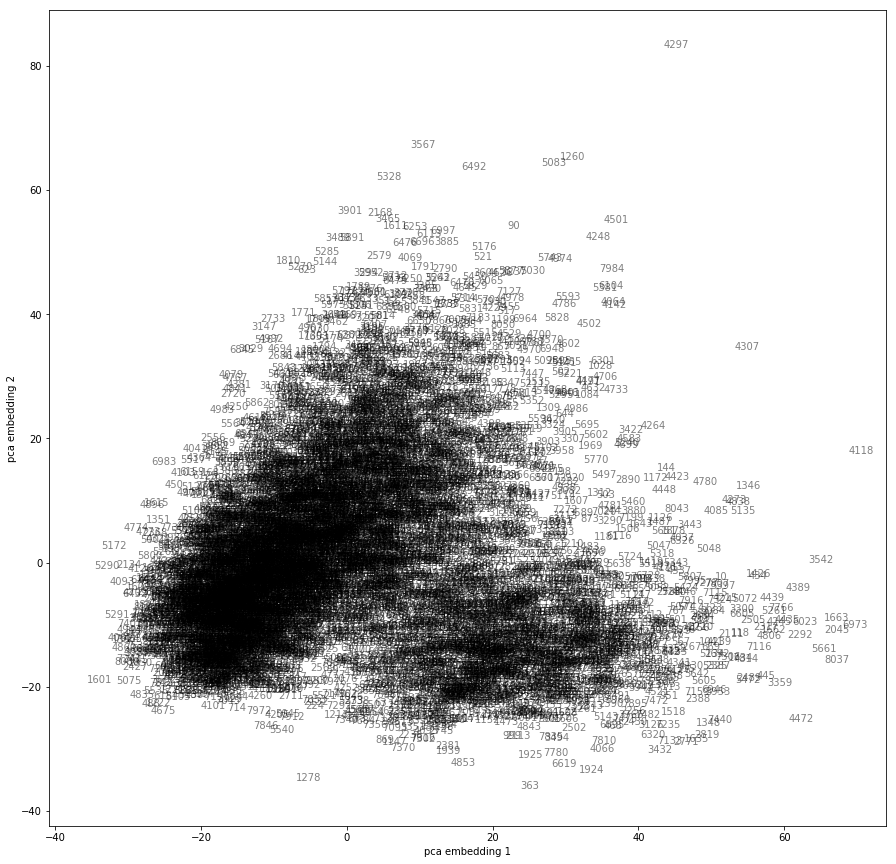

In [37]:
fig, ax=plt.subplots(figsize=(15,15))
ax.scatter(y_pca[:,0], y_pca[:,1], c="white")

for irow in range(y_pca.shape[0]):
    ax.annotate(irow, y_pca[irow,:],
                color="black",alpha=0.5)
ax.set_xlabel("pca embedding 1")
ax.set_ylabel("pca embedding 2")
plt.show()


#유사한 이미지 출력

In [38]:
picked_pic=OrderedDict()
picked_pic["red"]=[5083,1260]
picked_pic["green"]=[1601,5074]
picked_pic["blue"]=[5172,5290]
picked_pic["yellow"]=[5661,8037]
picked_pic["purple"]=[3422,4264]

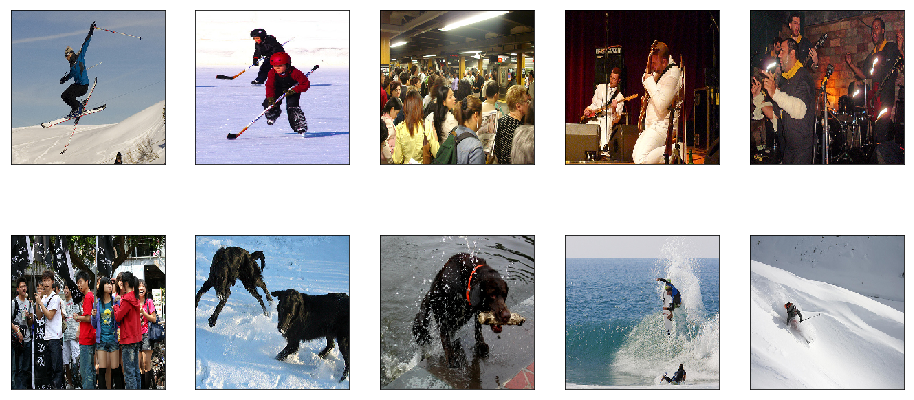

In [39]:
fig=plt.figure(figsize=(16,20))
count=1
for color, irows in picked_pic.items():
    for ivec in irows:
        name=jpgs[ivec]
        filename=dir_Flickr_jpg+"/"+name
        image=load_img(filename, target_size=target_size)
        fig.add_subplot(len(picked_pic), 5, count, xticks=[], yticks=[])
        count+=1
        plt.imshow(image)
plt.show()    

In [40]:
jpgs[5083]

'3329254388_27017bab30.jpg'

In [41]:
df_txt=df_txt.loc[df_txt['index'].values=="0", : ]

In [42]:
dimages, keepindex=[],[]
for i, fnm in enumerate(df_txt.filename):
    #print(i, fnm)
    if fnm in images.keys():
        dimages.append(images[fnm])
        keepindex.append(i)

In [43]:
fnames=df_txt['filename'].iloc[keepindex].values
dcaptions=df_txt['caption'].iloc[keepindex].values
dcaptions
dimages=np.array(dimages)

In [44]:
from keras.preprocessing.text import Tokenizer
nb_words=8000
tokenizer=Tokenizer(nb_words=nb_words)
tokenizer.fit_on_texts(dcaptions)
vocab_size=len(tokenizer.word_index)+1
dtexts=tokenizer.texts_to_sequences(dcaptions)
print(dtexts[:5])

C:\Users\user\Anaconda3\lib\site-packages\keras_preprocessing\text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


[[36, 1, 64, 142, 5, 122, 50, 403, 7, 363, 1, 22, 2321, 519], [10, 6, 3, 749, 6, 15, 364], [46, 13, 168, 1, 581, 99, 1, 39, 7, 548, 1189, 9, 53, 211, 1, 1069], [8, 618, 4, 148, 25, 21, 6, 99, 44, 110], [8, 1, 22, 80, 94, 1190, 17, 160]]


In [45]:
prop_test, prop_val=0.2, 0.2
N=len(dtexts) #8091
Ntest, Nval=int(N*prop_test), int(N*prop_val)

In [46]:
def split_test_val_train(dtexts, Ntest, Nval):
    return(dtexts[:Ntest],
          dtexts[Ntest:Ntest+Nval],
          dtexts[Ntest+Nval:])
dt_test, dt_val, dt_train=split_test_val_train(dtexts, Ntest, Nval)
di_test, di_val, di_train=split_test_val_train(dimages, Ntest, Nval)
fnm_test, fnm_val, fnm_train=split_test_val_train(fnames, Ntest, Nval)    

In [47]:
np.shape(dt_test) #(1618,)
np.shape(dt_val) #(1618,)
np.shape(dt_train) #(4855,)

(4855,)

In [48]:
maxlen=np.max([len(text) for text in dtexts])
print(maxlen)

28


In [49]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [50]:
#len(dtexts)

In [51]:
np.shape(dt_train) #4855
np.shape(dt_val) #1618

(1618,)

In [52]:
def preprocessing(dtexts, dimages):
    N=len(dtexts)
    Xtext, XImage, ytext=[],[],[]
    for text, image in  zip(dtexts, dimages):
        for i in range(1,len(text)):
            in_text, out_text=text[:i], text[i]
            in_text=pad_sequences([in_text], maxlen=maxlen).flatten()
            out_text=to_categorical(out_text, num_classes=vocab_size)
            
            Xtext.append(in_text)
            XImage.append(image)
            ytext.append(out_text)
    
    Xtext=np.array(Xtext)
    XImage=np.array(XImage)
    ytext=np.array(ytext)
    print(Xtext.shape, XImage.shape, ytext.shape)
    return(Xtext, XImage, ytext)   
    
            
Xtext_train, Ximage_train, ytext_train=preprocessing(dt_train, di_train)
Xtext_val, Ximage_val, ytext_val=preprocessing(dt_val, di_val)

(39793, 28) (39793, 4096) (39793, 4357)
(13079, 28) (13079, 4096) (13079, 4357)


In [53]:
di_val

array([[1.4617488 , 0.        , 0.        , ..., 0.        , 0.        ,
        1.0358739 ],
       [0.        , 0.        , 4.458635  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 2.6792164 , ..., 0.        , 3.223121  ,
        0.63798964],
       ...,
       [0.        , 0.        , 0.        , ..., 0.9784924 , 4.6599035 ,
        0.        ],
       [0.8659233 , 6.091996  , 0.6988917 , ..., 0.        , 0.        ,
        0.6468807 ],
       [0.72220516, 0.16119125, 0.        , ..., 0.        , 0.8654705 ,
        4.034038  ]], dtype=float32)

In [54]:
from keras import layers

In [55]:
vocab_size #4357
dim_embedding = 64


In [56]:
input_image=layers.Input(shape=(Ximage_train.shape[1],))
fimage=layers.Dense(256, activation='relu')(input_image)

input_txt=layers.Input(shape=(maxlen,))
ftxt=layers.Embedding(vocab_size, dim_embedding, mask_zero=True)(input_txt)
#0으로 패딩된 값을 마스킹해서 네트워크의 뒷부분으로
#전달되지 않게함. =>인위적으로 패딩된 부분은 학습에 미치지 않게 됨
ftxt=layers.LSTM(256)(ftxt)

decoder=layers.add([ftxt, fimage])
decoder=layers.Dense(256,activation='relu')(decoder)
output=layers.Dense(vocab_size, activation='softmax')(decoder)

model=models.Model(inputs=[input_image, input_txt], outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()


W0926 09:36:37.231910  7580 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:2974: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0926 09:36:37.276817  7580 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 28)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 28, 64)       278848      input_3[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 4096)         0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 256)          328704      embedding_1[0][0]                
__________________________________________________________________________________________________
dense_1 (D

In [57]:

hist=model.fit([Ximage_train, Xtext_train], 
               ytext_train,
              epochs=5,
              verbose=2,
              batch_size=64,
              validation_data=([Ximage_val,Xtext_val],ytext_val))

Train on 39793 samples, validate on 13079 samples
Epoch 1/5
 - 80s - loss: 5.8352 - val_loss: 5.3621
Epoch 2/5
 - 78s - loss: 4.8113 - val_loss: 4.9004
Epoch 3/5
 - 79s - loss: 4.2297 - val_loss: 4.7876
Epoch 4/5
 - 81s - loss: 3.8324 - val_loss: 4.7938
Epoch 5/5
 - 79s - loss: 3.4931 - val_loss: 4.8338


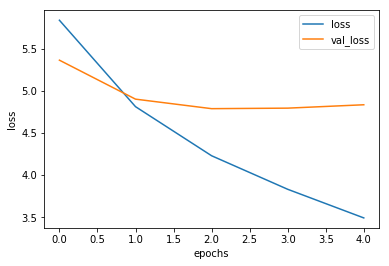

In [58]:
for label in ['loss', 'val_loss']:
    plt.plot(hist.history[label], label=label)
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [59]:
index_word=dict([(index,word) for word, index in tokenizer.word_index.items()])

In [60]:
index_word

{1: 'in',
 2: 'the',
 3: 'and',
 4: 'on',
 5: 'is',
 6: 'dog',
 7: 'of',
 8: 'man',
 9: 'with',
 10: 'black',
 11: 'boy',
 12: 'white',
 13: 'girl',
 14: 'brown',
 15: 'are',
 16: 'to',
 17: 'at',
 18: 'two',
 19: 'water',
 20: 'red',
 21: 'his',
 22: 'an',
 23: 'woman',
 24: 'wearing',
 25: 'while',
 26: 'blue',
 27: 'people',
 28: 'group',
 29: 'shirt',
 30: 'playing',
 31: 'running',
 32: 'standing',
 33: 'through',
 34: 'ball',
 35: 'down',
 36: 'child',
 37: 'jumping',
 38: 'another',
 39: 'front',
 40: 'over',
 41: 'grass',
 42: 'snow',
 43: 'dogs',
 44: 'by',
 45: 'holding',
 46: 'little',
 47: 'green',
 48: 'sitting',
 49: 'field',
 50: 'up',
 51: 'yellow',
 52: 'walking',
 53: 'her',
 54: 'beach',
 55: 'into',
 56: 'from',
 57: 'large',
 58: 'person',
 59: 'air',
 60: 'children',
 61: 'mouth',
 62: 'player',
 63: 'for',
 64: 'pink',
 65: 'as',
 66: 'jumps',
 67: 'its',
 68: 'near',
 69: 'street',
 70: 'runs',
 71: 'riding',
 72: 'stands',
 73: 'one',
 74: 'behind',
 75: 'bike'

In [61]:
def predict_caption(image):
    #(1,)
    in_text="startseq"
    for iword in range(maxlen):
        sequence=tokenizer.texts_to_sequences([in_text])[0]
        sequence=pad_sequences([sequence], maxlen)
        yhat=model.predict([image, sequence], verbose=0)
        yhat=np.argmax(yhat)
        newword=index_word[yhat]
        in_text+= " "+newword
        if newword=="endseq":
            break
    return(in_text)

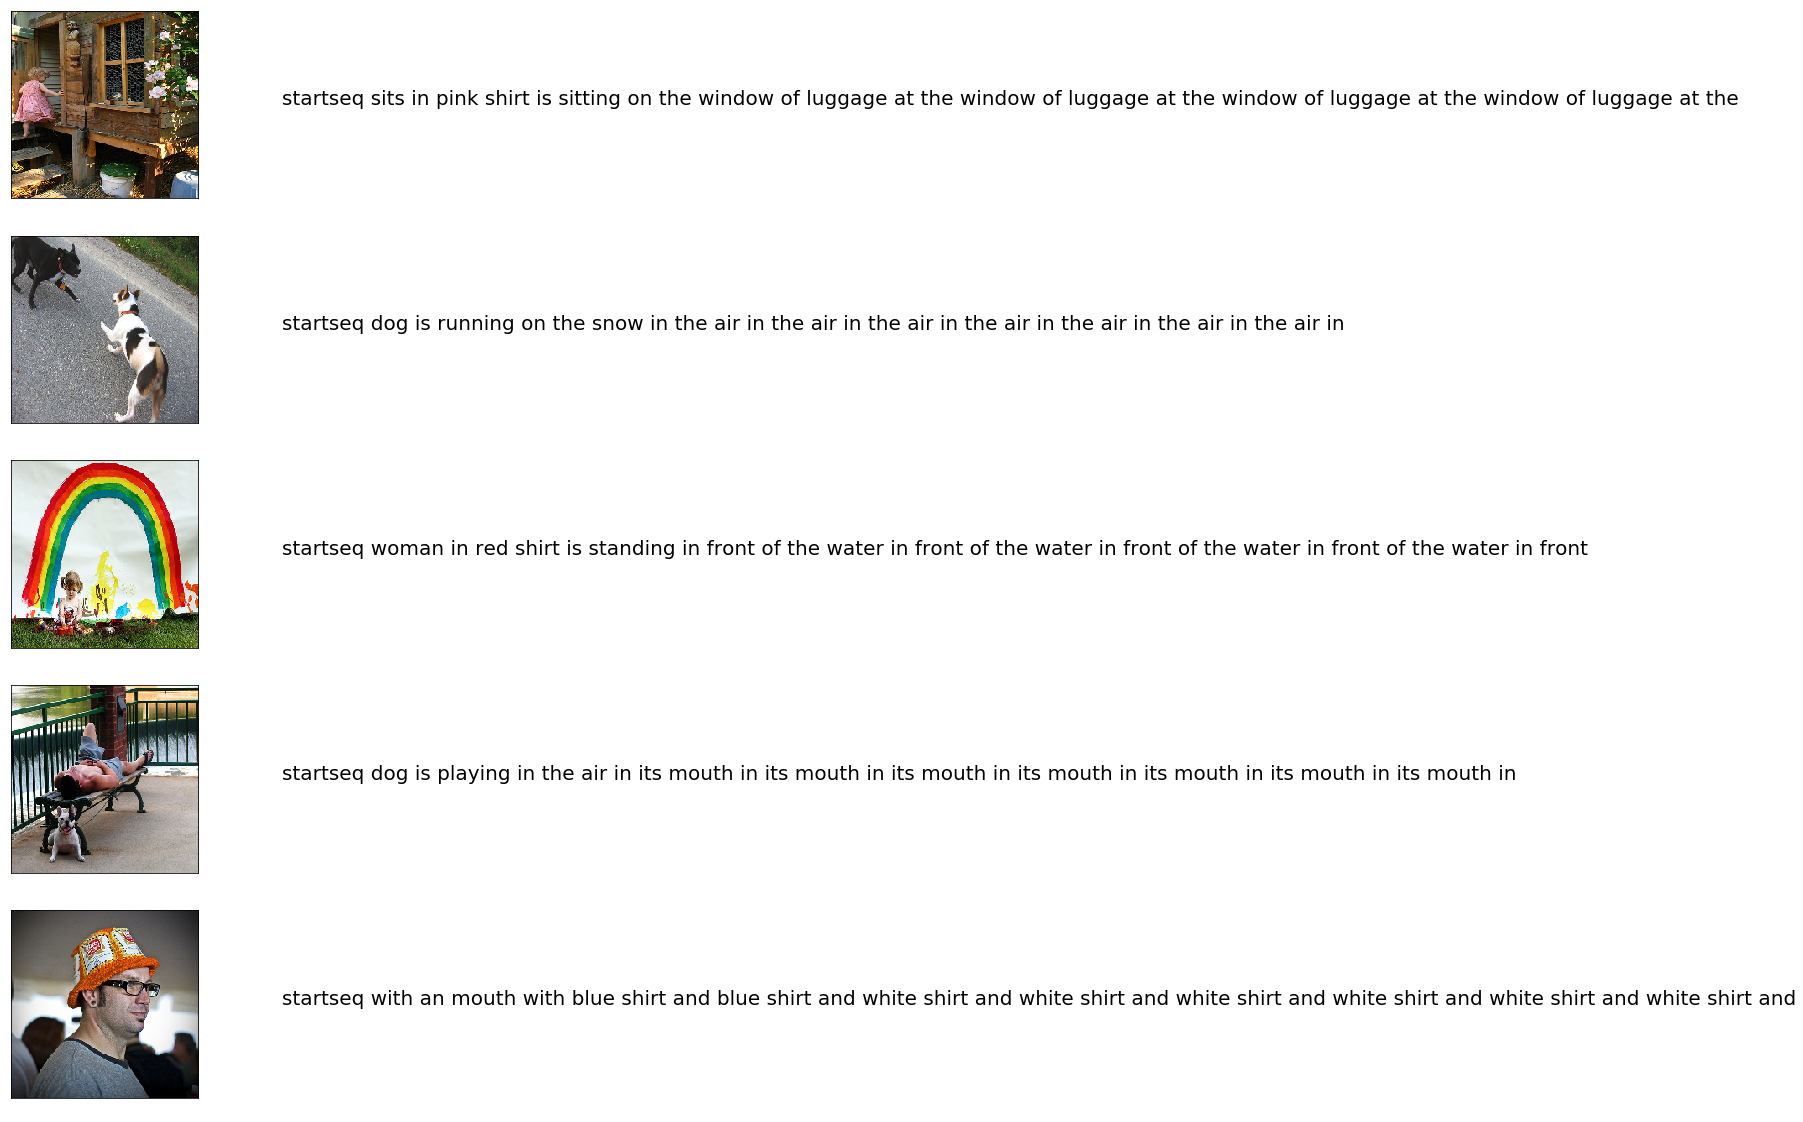

In [62]:
npic=5
npix=224
target_size=(npix,npix,3)
count=1
fig=plt.figure(figsize=(10,20))
for jpgfnm,image_feature in zip(fnm_test[:npic], di_test[:npic]):
    filename=dir_Flickr_jpg+"/"+jpgfnm
    image_load=load_img(filename, target_size=target_size)
    ax=fig.add_subplot(npic,2,count,xticks=[],yticks=[])
    ax.imshow(image_load)
    count+=1
    
    caption=predict_caption(image_feature.reshape(1,len(image_feature)))
    ax=fig.add_subplot(npic,2,count)
    plt.axis('off')    
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.text(0,0.5,caption,fontsize=20)
    count+=1
#print(caption)
plt.show()
    